<a href="https://colab.research.google.com/github/jayywiz/Data-Cleaning/blob/main/Cafe_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Cleaning:** Dirty Cafe Sales

 Dataset link: https://www.kaggle.com/datasets/ahmedmohamed2003/cafe-sales-dirty-data-for-cleaning-training

## **Step 1: Loading and Analysing the dataset**

In this step we will be importing the necessary libraries, and read the dataset.

- df.head() : gives the first 5 columns of the dataset, inside the parantheses, we can select how many ever rows we want.

- df.shape : gives a tuple that has the number of rows followed by number of columns in the dataset. A tuple is immutable.

- df.info() : this gives a comprehensive summary of the dataset.

- df.dtypes : shows the datatypes of each column.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('dirty_cafe_sales.csv')
df.head(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,NaN,2023-03-31
6,TXN_4433211,UNKNOWN,3,3.0,9.0,ERROR,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4,4.0,16.0,Cash,UNKNOWN,2023-10-28
8,TXN_4717867,NaN,5,3.0,15.0,NaN,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5,4.0,20.0,NaN,In-store,2023-12-31


In [ ]:
df.shape

(10000, 8)

In [ ]:
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")

Rows: 10000
Columns: 8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [ ]:
df.dtypes

,0
Transaction ID,object
Item,object
Quantity,object
Price Per Unit,object
Total Spent,object
Payment Method,object
Location,object
Transaction Date,object


## **Step 2: Data Cleaning Process**

We will be starting off witht the numerical columns as they are easy to deal with.

**Converting data types:**

- pd.to_numeric(df[' '], errors = 'coerce')

- errors = 'coerce' essentially replace any invalid values with NaN

In [ ]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors = 'coerce')
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'], errors = 'coerce')
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors = 'coerce')

In [ ]:
df.dtypes

,0
Transaction ID,object
Item,object
Quantity,float64
Price Per Unit,float64
Total Spent,float64
Payment Method,object
Location,object
Transaction Date,object


**Handling Invalid Values:**

we start by replacing invalid categorical values with NA

- df.replace([ ], pd.NA)

In [ ]:
df_new = df.replace(['UNKNOWN', 'ERROR'], pd.NA)
df_new.head(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,NaN,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,<NA>,<NA>,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5.0,4.0,20.0,Credit Card,NaN,2023-03-31
6,TXN_4433211,<NA>,3.0,3.0,9.0,<NA>,Takeaway,2023-10-06
7,TXN_6699534,Sandwich,4.0,4.0,16.0,Cash,<NA>,2023-10-28
8,TXN_4717867,NaN,5.0,3.0,15.0,NaN,Takeaway,2023-07-28
9,TXN_2064365,Sandwich,5.0,4.0,20.0,NaN,In-store,2023-12-31


**Finding out the Missing Values:**

**- .isna.sum()** : gives all the number of missing values of each column.

When dealing with missing data:

- 0–5% missing: Keep and impute using simple methods (mean, median, mode).

- 5–20% missing: Usually keep; impute with care to preserve data patterns.

- 20–40% missing: Evaluate based on importance; impute if valuable, or drop if not.

- 40–60% missing: Generally drop unless the column is critical.

- Over 60% missing: Drop the column unless it holds essential, irreplaceable information.

Always consider the column's relevance to your target and use domain knowledge to decide


**- pd.DataFrame({})** : creates a DataFrame from a dictionary, where each key is a unique column name and each corresponding value provides the data for that column.

In [ ]:
missing_count = df_new.isna().sum()
missing_percent = (missing_count / len(df_new)) * 100

missing_summary = pd.DataFrame({
    'Missing count': missing_count,
    'Missing percent': missing_percent
})

missing_summary

,Missing count,Missing percent
Transaction ID,0,0.00
Item,969,9.69
Quantity,479,4.79
Price Per Unit,533,5.33
Total Spent,502,5.02
Payment Method,3178,31.78
Location,3961,39.61
Transaction Date,460,4.60


**Numerical imputation using mathematical relationships:**

In [ ]:
df_new['Price Per Unit'] = df_new['Price Per Unit'].fillna(df_new['Total Spent'] / df_new['Quantity'])
df_new['Quantity'] = df_new['Quantity'].fillna(df_new['Total Spent'] / df_new['Price Per Unit'])
df_new['Total Spent'] = df_new['Total Spent'].fillna(df_new['Price Per Unit'] * df_new['Quantity'])

In [ ]:
df_new.isna().sum()

,0
Transaction ID,0
Item,969
Quantity,38
Price Per Unit,38
Total Spent,40
Payment Method,3178
Location,3961
Transaction Date,460


This line fills missing values in the 'Item' column by using a reverse lookup from the 'Price Per Unit' via the price_to_item dictionary. If 'Item' is already present, it remains unchanged.

In [ ]:
price_to_item = {
    2.0: 'Coffee',
    1.0: 'Cookie',
    5.0: 'Salad',
    1.5: 'Tea'
}

df_new['Item'] = df_new.apply(
    lambda row: price_to_item.get(row['Price Per Unit'], row['Item'])
    if pd.isna(row['Item']) else row['Item'],
    axis = 1
  )

In [ ]:
df_new.isna().sum()

,0
Transaction ID,0
Item,480
Quantity,38
Price Per Unit,38
Total Spent,40
Payment Method,3178
Location,3961
Transaction Date,460


In [ ]:
df_new.describe()

,Quantity,Price Per Unit,Total Spent
count,9962.000000,9962.000000,9960.000000
mean,3.025597,2.947902,8.930924
std,1.420181,1.279759,6.004475
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,4.000000
50%,3.000000,3.000000,8.000000
75%,4.000000,4.000000,12.000000
max,5.000000,5.000000,25.000000


Here, we will impute missing values in 'Total Spent' and 'Price Per Unit' using the mean, as the data is approximately normally distributed and no significant outliers were observed.

In [ ]:
df_new['Total Spent'] = df_new['Total Spent'].fillna(df_new['Total Spent'].mean())
df_new['Price Per Unit']= df_new['Price Per Unit'].fillna(df_new['Price Per Unit'].mean())
df_new['Quantity'] = df_new['Quantity'].fillna(df_new['Total Spent'] / df_new['Price Per Unit'])

In [ ]:
df_new.isna().sum()

,0
Transaction ID,0
Item,480
Quantity,0
Price Per Unit,0
Total Spent,0
Payment Method,3178
Location,3961
Transaction Date,460


**Handling Categorical Variables:**

Filling missing values in selected categorical columns with their respective mode (most frequent value, the first node), which is a common imputation strategy for categorical data.

In [ ]:
for col in ['Item','Payment Method', 'Location']:
  mode_value = df_new[col].mode()[0]
  df_new[col].fillna(mode_value, inplace= True)

/tmp/ipython-input-62-2695109568.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new[col].fillna(mode_value, inplace= True)


In [ ]:
df_new.isna().sum()

,0
Transaction ID,0
Item,0
Quantity,0
Price Per Unit,0
Total Spent,0
Payment Method,0
Location,0
Transaction Date,460


**Handling Datetime:**

In [ ]:
df_new['Transaction Date'] = pd.to_datetime(df_new['Transaction Date'], errors = 'coerce')

In [ ]:
# df_new['Transaction Date'] = df_new['Transaction Date'].fillna(df_new['Transaction Date'].mode()[0])

Sets a start date and end date in 2023. Finds the number of days between them (365 days). Picks a random number between 0 and 365. Adds that many days to Jan 1, 2023, giving a random date in 2023.

In [ ]:
def random_2023():
  start = pd.Timestamp('2023-01-01')
  end = pd.Timestamp('2023-12-31')
  rand_days = np.random.randint(0, (end-start).days + 1)
  return start + pd.Timedelta(days = rand_days)

Goes through each value in the 'Transaction Date' column. If the value is missing (NaN), it replaces it with a random date from 2023. If the value is not missing, it keeps the original date.

In [ ]:
df_new['Transaction Date'] = df_new['Transaction Date'].apply(
    lambda x: random_2023() if pd.isna(x) else x
)

In [ ]:
df_new.isna().sum()

,0
Transaction ID,0
Item,0
Quantity,0
Price Per Unit,0
Total Spent,0
Payment Method,0
Location,0
Transaction Date,0


The dataset is cleaned!!!

## **Step 3: Feature Engineering**

In [ ]:
df_new['Year'] = df_new['Transaction Date'].dt.year
df_new['Month'] = df_new['Transaction Date'].dt.month_name()
df_new['Weekday'] = df_new['Transaction Date'].dt.day_name()

In [ ]:
df_new

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Year,Month,Weekday
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08,2023,September,Friday
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16,2023,May,Tuesday
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19,2023,July,Wednesday
3,TXN_7034554,Salad,2.0,5.0,10.0,Digital Wallet,Takeaway,2023-04-27,2023,April,Thursday
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11,2023,June,Sunday
...,...,...,...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2.0,2.0,4.0,Digital Wallet,Takeaway,2023-08-30,2023,August,Wednesday
9996,TXN_9659401,Cookie,3.0,1.0,3.0,Digital Wallet,Takeaway,2023-06-02,2023,June,Friday
9997,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,Takeaway,2023-03-02,2023,March,Thursday
9998,TXN_7695629,Cookie,3.0,1.0,3.0,Digital Wallet,Takeaway,2023-12-02,2023,December,Saturday


## **Step 4: EDA**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

**1. Distribution of Items Sold**

/tmp/ipython-input-78-2846508949.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_new, x = 'Item', order = df_new['Item'].value_counts().index, palette='Set2')


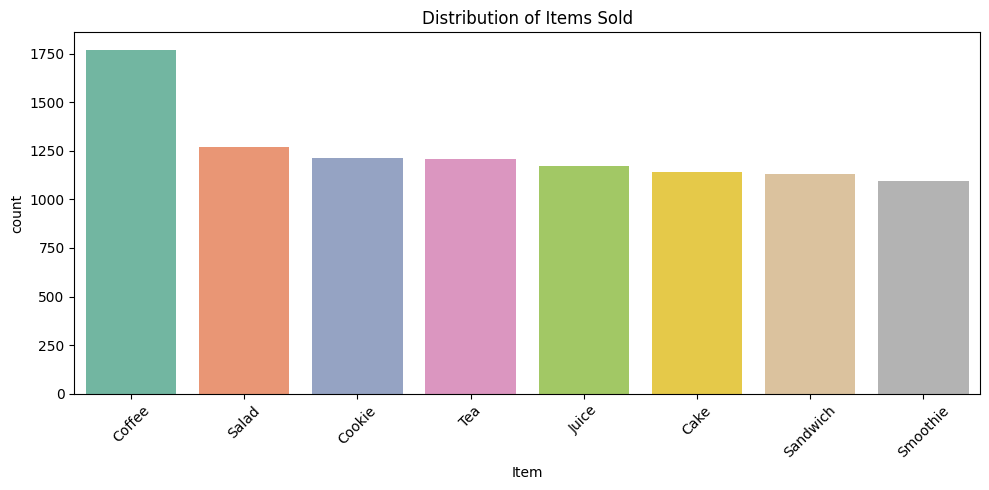

In [ ]:
plt.figure(figsize = (10, 5))
sns.countplot(data = df_new, x = 'Item', order = df_new['Item'].value_counts().index, palette='Set2')
plt.title('Distribution of Items Sold')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

**2. Orders by Month**

/tmp/ipython-input-81-3323181112.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_new, x = 'Month', order = month_order, palette = 'pastel')


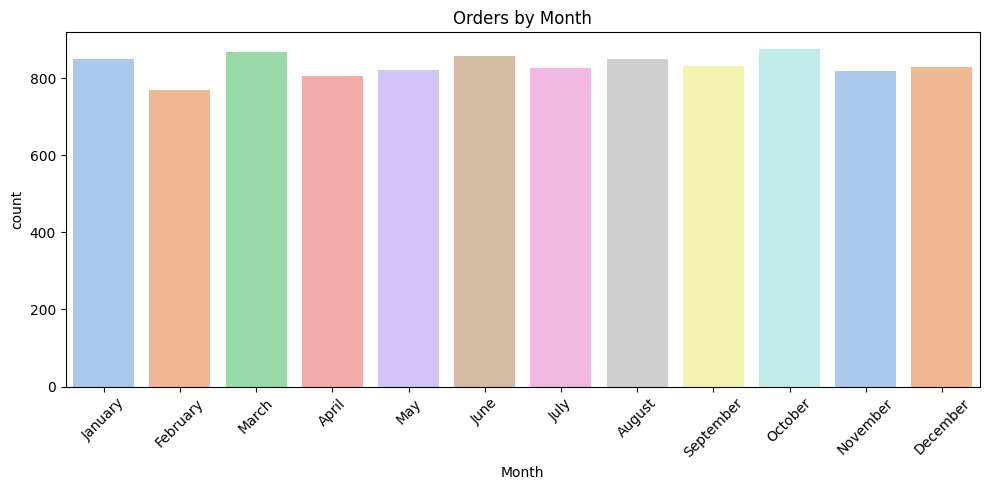

In [ ]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize = (10,5))
sns.countplot(data=df_new, x = 'Month', order = month_order, palette = 'pastel')
plt.title('Orders by Month')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

**3. Sales by Location**

/tmp/ipython-input-84-3537395855.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_new, x='Location', order=df_new['Location'].value_counts().index, palette='Set2')


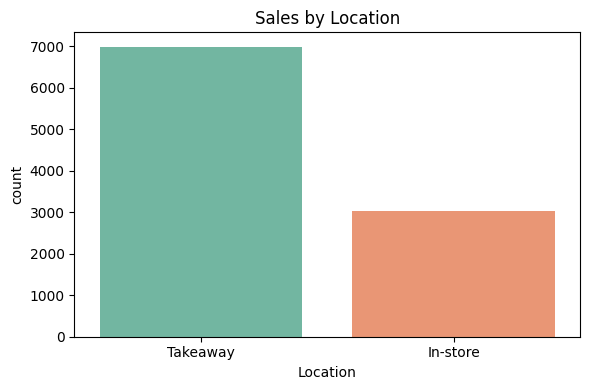

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_new, x='Location', order=df_new['Location'].value_counts().index, palette='Set2')
plt.title('Sales by Location')
plt.tight_layout()
plt.show()

**4. Total Revenue by Item**

/tmp/ipython-input-86-4153234602.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_item.index, y=revenue_by_item.values, palette='pastel')


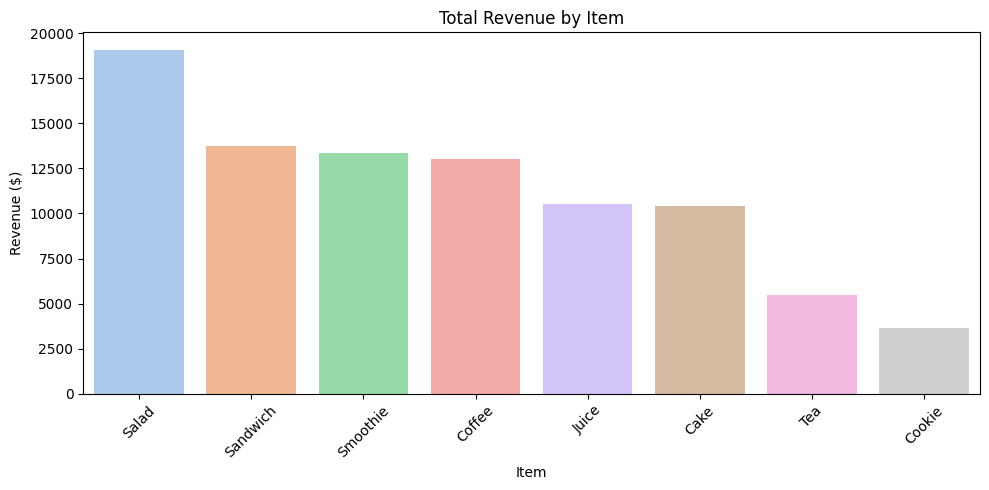

In [ ]:
plt.figure(figsize=(10, 5))
revenue_by_item = df_new.groupby('Item')['Total Spent'].sum().sort_values(ascending=False)
sns.barplot(x=revenue_by_item.index, y=revenue_by_item.values, palette='pastel')
plt.title('Total Revenue by Item')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()